In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv('direhorse_data.csv')
df.head()

,Ages,Weights
0,15,21.66
1,15,22.75
2,15,22.30
3,18,31.25
4,28,44.79


In [ ]:
df.shape

(71, 2)

In [ ]:
predictions = 233.846*(1-np.exp(-0.006042*df['Ages']))
print("Mean Squared Error of the non-linear model",mean_squared_error(predictions,df['Weights']))

Mean Squared Error of the non-linear model 76.11624235046557


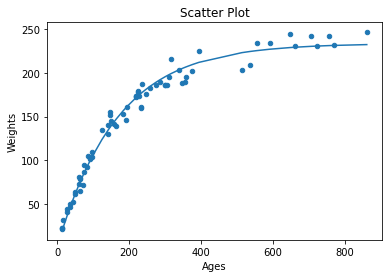

In [ ]:
df.plot.scatter(x='Ages',y='Weights',marker='o')
plt.title('Scatter Plot')
plt.plot(df['Ages'],predictions)

In [ ]:
shuffled_df = df.sample(frac=1,random_state=1).reset_index(drop=True)
x_train, y_train = shuffled_df['Ages'], shuffled_df['Weights']
# x_test, y_test = df[50:]['Ages'], df[50:]['Weights'] 

In [ ]:
model = tf.keras.models.Sequential([
  # tf.keras.layers.Normalization(input_shape=[1,], axis=None),
  tf.keras.layers.InputLayer(input_shape=(1,)),
  tf.keras.layers.Dense(1024,activation='sigmoid'),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1024)              2048      
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 dense_41 (Dense)            (None, 1)                 513       
                                                                 
Total params: 527,361
Trainable params: 527,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error,)

In [ ]:
history = model.fit(x_train, y_train, epochs=250, validation_split=0.15)

Epoch 1/250
2/2 [==============================] - 1s 165ms/step - loss: 24689.1133 - val_loss: 17579.2520
Epoch 2/250
2/2 [==============================] - 0s 36ms/step - loss: 20481.8027 - val_loss: 14656.7031
Epoch 3/250
2/2 [==============================] - 0s 38ms/step - loss: 16936.8477 - val_loss: 11982.6875
Epoch 4/250
2/2 [==============================] - 0s 35ms/step - loss: 13375.9248 - val_loss: 9605.5771
Epoch 5/250
2/2 [==============================] - 0s 39ms/step - loss: 10172.6709 - val_loss: 7661.9282
Epoch 6/250
2/2 [==============================] - 0s 46ms/step - loss: 7416.8335 - val_loss: 6254.4263
Epoch 7/250
2/2 [==============================] - 0s 33ms/step - loss: 5078.2666 - val_loss: 5426.3169
Epoch 8/250
2/2 [==============================] - 0s 33ms/step - loss: 3698.3008 - val_loss: 5176.8262
Epoch 9/250
2/2 [==============================] - 0s 36ms/step - loss: 2922.7322 - val_loss: 5365.2163
Epoch 10/250
2/2 [==============================] - 0s 

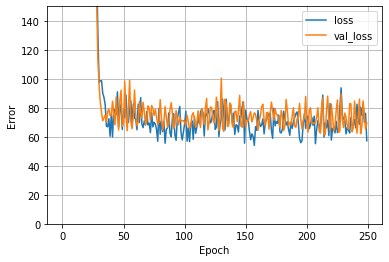

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 150])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
print("Mean Squared Error of the trained ANN",mean_squared_error(df['Weights'],model.predict(df['Ages'])))

Mean Squared Error of the trained ANN 60.682102730374254


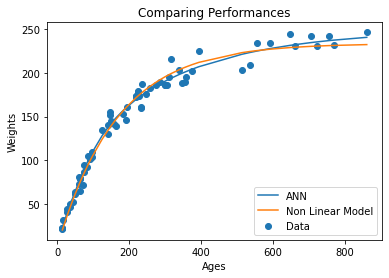

In [ ]:
plt.plot(df['Ages'],model.predict(df['Ages']),label='ANN')
plt.scatter(df['Ages'],df['Weights'],label='Data',marker='o')
plt.plot(df['Ages'],predictions,label='Non Linear Model')
plt.xlabel('Ages')
plt.ylabel('Weights')
plt.title("Comparing Performances")
plt.legend()
plt.show()